In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
#Importowanie wartości wszystkich walut przez rok poprzedzający pandemie
data_1=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2019-03-01/2019-05-30/')
data_2=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2019-06-01/2019-08-31/')
data_3=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2019-09-01/2019-11-30/')
data_4=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2019-12-01/2020-02-29/')

frames = [data_1, data_2, data_3, data_4]
df_19 = pd.concat(frames)

#Importowanie wartości wszystkich walut przez 2lata przed pandemie
data_1=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2018-03-01/2018-05-30/')
data_2=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2018-06-01/2018-08-31/')
data_3=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2018-09-01/2018-11-30/')
data_4=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2018-12-01/2019-02-28/')

frames = [data_1, data_2, data_3, data_4]
df_18 = pd.concat(frames)

#Importowanie wartości wszystkich walut przez rok pandemi

data_1=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2020-03-01/2020-05-30/')
data_2=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2020-06-01/2020-08-31/')
data_3=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2020-09-01/2020-11-30/')
data_4=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2020-12-01/2021-02-28/')

frames = [data_1, data_2, data_3, data_4]
df_20 = pd.concat(frames)

In [73]:
# Połączenie zagnieżdzonej tabeli w jedną
def marge_nested_column(col):
    frames = []

    for i, item in enumerate(col):
        frames.append(pd.DataFrame.from_dict(col.iloc[i], orient='columns'))

    return pd.concat(frames)


df_18 = marge_nested_column(df_18['rates'])
df_19 = marge_nested_column(df_19['rates'])
df_20 = marge_nested_column(df_20['rates'])

In [113]:
# Obliczenie średniej wartości dla każdej waluty

df_18 = df18.groupby('code').mean().reset_index()
df_19 = df19.groupby('code').mean().reset_index()
df_20 = df20.groupby('code').mean().reset_index()

In [107]:
# Oznaczenie które waluty są dla krajów wysokorozwiniętych

def target_dev_countries(df):
    currencies = ['NOK', 'AUD', 'CHF', 'EUR', 'DKK', 'SGD', 'ISK', 'CAD', 'USD', 'HKD', 'NZD', 'SEK', 'GBP', 'JPY', 'KRW', 'ILS', 'CZK','CLP','HUF','HRK','RUB','RON']
    df['dev_countries'] = np.where(df['code'].isin(currencies), 1, 0)
    return True

target_dev_countries(df_18)
target_dev_countries(df_19)
target_dev_countries(df_20)

df_18_19 = df_18[['code','dev_countries']].copy(deep=True)
df_18_19['diff'] = ((df_19['mid']/df_18['mid'])-1)*100

df_19_20 = df_18[['code','dev_countries']].copy(deep=True)
df_19_20['diff'] = ((df_20['mid']/df_19['mid'])-1)*100

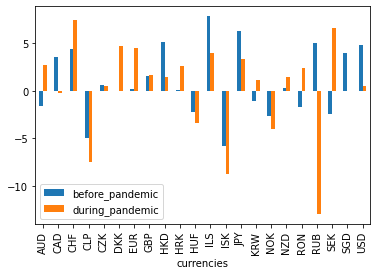

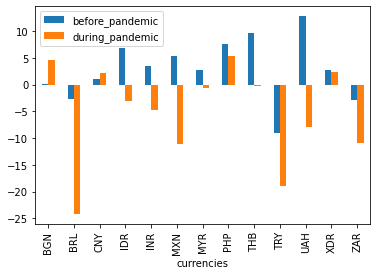

In [119]:
plot1 = {'currencies' : df_18_19['code'].loc[(df_18_19['dev_countries'] == 1)],
          'before_pandemic' : df_18_19['diff'].loc[(df_18_19['dev_countries'] == 1)],
          'during_pandemic' : df_19_20['diff'].loc[(df_18_19['dev_countries'] == 1)]}


df = pd.DataFrame(plot1)
df.plot('currencies',y=['before_pandemic','during_pandemic'], kind='bar')
plt.show()

plot2 = {'currencies' : df_18_19['code'].loc[(df_18_19['dev_countries'] == 0)],
          'before_pandemic' : df_18_19['diff'].loc[(df_18_19['dev_countries'] == 0)],
          'during_pandemic' : df_19_20['diff'].loc[(df_18_19['dev_countries'] == 0)]}


df = pd.DataFrame(plot2)
df.plot('currencies',y=['before_pandemic','during_pandemic'], kind='bar')
plt.show()


